In [20]:
import numpy as np
import tqdm
import matplotlib.pyplot as plt

In [74]:
OD = np.random.randint(100,10000, (1000,1000))
# OD does not need to be symmetric? 
#OD = (OD + OD.T)/2
thresh = 200

In [6]:
# initialize the population vector from the origin-destination flow matrix
N_k = np.abs(np.diagonal(OD) + OD.sum(axis=0) - OD.sum(axis=1))
locs_len = len(N_k)                 # number of locations
SIR = np.zeros(shape=(locs_len, 3)) # make a numpy array with 3 columns for keeping track of the S, I, R groups
SIR[:,0] = N_k                      # initialize the S group with the respective populations

In [7]:
first_infections = np.where(SIR[:, 0]<=thresh, SIR[:, 0]//20, 0)   # for demo purposes, randomly introduce infections
SIR[:, 0] = SIR[:, 0] - first_infections
SIR[:, 1] = SIR[:, 1] + first_infections                           # move infections to the I group

In [8]:
# row normalize the SIR matrix for keeping track of group proportions
row_sums = SIR.sum(axis=1)
SIR_n = SIR / row_sums[:, np.newaxis]

In [100]:
# initialize parameters
beta = 0.16
gamma = 0.04
public_trans = 0.5                                 # alpha
R0 = beta/gamma
beta_vec = np.random.gamma(beta, 1/gamma, locs_len)
gamma_vec = np.full(locs_len, gamma)
public_trans_vec = np.full(locs_len, public_trans)

In [102]:
beta_vec.mean()

3.882696644358391

In [103]:
# make copy of the SIR matrices 
SIR_sim = SIR.copy()
SIR_nsim = SIR_n.copy()

In [104]:
# run model
print(SIR_sim.sum(axis=0).sum() == N_k.sum())
infected_pop_norm = []
susceptible_pop_norm = []
recovered_pop_norm = []
for time_step in tqdm.tqdm_notebook(range(100)):
  infected_mat = np.array([SIR_nsim[:,1],]*locs_len).transpose()
  OD_infected = np.round(OD*infected_mat)
  inflow_infected = OD_infected.sum(axis=0)
  inflow_infected = np.round(inflow_infected*public_trans_vec)
  print('total infected inflow: ', inflow_infected.sum())
  new_infect = beta_vec*SIR_sim[:, 0]*inflow_infected/(N_k + OD.sum(axis=0))
  new_recovered = gamma_vec*SIR_sim[:, 1]
  new_infect = np.where(new_infect>SIR_sim[:, 0], SIR_sim[:, 0], new_infect)
  SIR_sim[:, 0] = SIR_sim[:, 0] - new_infect
  SIR_sim[:, 1] = SIR_sim[:, 1] + new_infect - new_recovered
  SIR_sim[:, 2] = SIR_sim[:, 2] + new_recovered
  SIR_sim = np.where(SIR_sim<0,0,SIR_sim)
  # recompute the normalized SIR matrix
  row_sums = SIR_sim.sum(axis=1)
  SIR_nsim = SIR_sim / row_sums[:, np.newaxis]
  S = SIR_sim[:,0].sum()/N_k.sum()
  I = SIR_sim[:,1].sum()/N_k.sum()
  R = SIR_sim[:,2].sum()/N_k.sum()
  print(S, I, R, (S+I+R)*N_k.sum(), N_k.sum())
  print('\n')
  infected_pop_norm.append(I)
  susceptible_pop_norm.append(S)
  recovered_pop_norm.append(R)

True


<ipython-input-104-de1afcd48c3d>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for time_step in tqdm.tqdm_notebook(range(100)):


total infected inflow:  126752.0
0.9999117597229422 8.823988228994173e-05 3.947677755367798e-10 101325392.99999999 101325393


total infected inflow:  339444.0
0.99967602703722 0.00032044297272071197 3.5299900593732054e-06 101325393.00000003 101325393


total infected inflow:  966285.0
0.9990052891878995 0.0009783631031322411 1.6347708968201686e-05 101325393.0 101325393


total infected inflow:  2756953.0
0.9971002040217173 0.0028443137451892447 5.548223309349133e-05 101325393.0 101325393


total infected inflow:  7851114.0
0.9917605559371985 0.008070189279900592 0.00016925478290106115 101325393.0 101325393


total infected inflow:  22152915.0
0.9773696693660887 0.022138268279814115 0.0004920623540970849 101325392.99999999 101325393


total infected inflow:  60806727.0
0.9427467856449256 0.05587562126978471 0.0013775930852896493 101325393.0 101325393


total infected inflow:  154436753.0
0.8818865068403299 0.11450087522358915 0.0036126179360810376 101325393.00000003 101325393


total i

0.4437569016122086 0.065851187598495 0.49039191078929634 101325392.99999999 101325393


total infected inflow:  164824364.0
0.4433802778642889 0.06359376384247484 0.4930259582932362 101325393.0 101325393


total infected inflow:  159128471.0
0.4430188108623988 0.06141148029066596 0.4955697088469352 101325393.0 101325393


total infected inflow:  153624423.0
0.44267181649020054 0.05930201545123759 0.49802616805856187 101325393.0 101325393


total infected inflow:  148305811.0
0.44233865449737475 0.05726309682601396 0.5003982486766113 101325393.0 101325393


total infected inflow:  143167317.0
0.44201871460754694 0.055292512842801074 0.5026887725496519 101325393.0 101325393


total infected inflow:  138202467.0
0.4417114181027137 0.053388108833922324 0.5049004730633639 101325393.0 101325393


total infected inflow:  133406707.0
0.44141621390861824 0.05154778867466094 0.5070359974167208 101325393.0 101325393


total infected inflow:  128773563.0
0.44113258073954376 0.04976951029674898 0.5

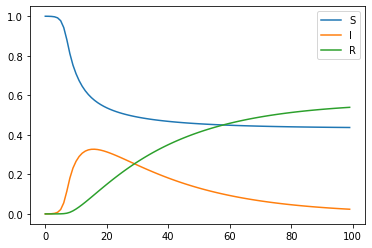

In [105]:
plt.plot(susceptible_pop_norm, label='S')
plt.plot(infected_pop_norm, label='I')
plt.plot(recovered_pop_norm, label='R')
plt.legend()